##Problem Description

For this project, I'll be examining a dataset obtained from a survey of Portuguese language students in secondary school. That data set can be found [here](https://www.kaggle.com/uciml/student-alcohol-consumption). Descriptions of the variables from UCI Machine Learning on Kaggle are below.

**school** - student's school
- 'GP': Gabriel Pereira
- 'MS': Mousinho da Silveira

**sex** - student's sex
- 'F': female
- 'M': male

**age** - student's age in years

**address** - student's home address type
- 'U': urban
- 'R': rural

**famsize** - family size
- 'LE3': less or equal to 3
- 'GT3': greater than 3

**Pstatus** - parent's cohabitation status
- 'T': living together
- 'A': apart

**Medu** - mother's education and **Fedu** - father's education
- 0: none
- 1: primary education
- 2: 5th to 9th grade
- 3: secondary education
- 4: higher education

**Mjob** - mother's job and **Fjob** - father's job
- 'teacher'
- 'health' care related
- civil 'services' (e.g. administrative or police)
- 'at_home'
- 'other'

**reason** - reason to choose this school
- close to 'home'
- school 'reputation'
- 'course' preference
- 'other'

**guardian** - student's guardian
- 'mother'
- 'father'
- 'other'

**traveltime** - home to school travel time
- 1: <15 min
- 2: 15 to 30 min
- 3: 30 min to 1 hour
- 4: >1 hour

**studytime** - weekly study time
- 1: <2 hours
- 2: 2 to 5 hours
- 3: 5 to 10 hours
- 4: >10 hours

**failures** - number of past class failures
- n if 0<=n<=2
- else 3

**schoolsup** - extra educational support (yes or no)

**famsup** - family educational support (yes or no)

**paid** - extra paid classes within the course subject (yes or no)

**activities** - extra-curricular activities (yes or no)

**nursery** - attended nursery school (yes or no)

**higher** - wants to take higher education (yes or no)

**internet** - Internet access at home (yes or no)

**romantic** - with a romantic relationship (yes or no)

**famrel** - quality of family relationships
- from 1: very bad
- to 5: excellent

**freetime** - free time after school, **goout** - going out with friends, **Dalc** - workday alcohol consumption, and **Walc** - weekend alcohol consumption
- from 1: very low
- to 5: very high

**health** - current health status
- from 1: very bad
- to 5: very good

**absences** - number of school absences

**G1** - first period grade (0 to 20)

**G2** - second period grade (0 to 20)

**G3** - final grade (0 to 20, output target)

The goal of this capstone is to create a model that can predict a students final grade. For this analysis, we will be considering every variable, with the exception of **G2**. The assumption will be that first period grades have just come out, and we want a model that can tell us whether or not a student is at risk of failing the course.

As you can see, there are several variables where a value from 1 to 4 is used to indicate a category. These will be treated as categorical variables, and not numeric. Additionally, there are variables where a quality or behavior was rated from 1 to 5. These could be treated as continuous variables, however since there are only 5 possibilities, we'll treat them as categorical as well. If models take too long to run, then I may consider switching to a continuous set up.

The target variable for this model is **G3**, the student's final grade. This will be treated as continuous, and therefore the problem is a regression one. Next we examine the data.

##Data Import and Exploration

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
students_df = pd.read_csv("/content/drive/My Drive/Data Science/Capstones/student-por.csv").drop(columns='G2')
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

###Missing/Invalid Values
It looks like we don't have any missing values from our columns. Let's make sure all values in our categorical values are valid. Since none of our variables should have a large number of unique values, we can do this by simply printing them and inspecting.

In [3]:
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13


In [4]:
for col in students_df.columns:
  print("Unique values of ", col, ":", np.sort(students_df[col].unique()),"\n")
  print("-"*80)

Unique values of  school : ['GP' 'MS'] 

--------------------------------------------------------------------------------
Unique values of  sex : ['F' 'M'] 

--------------------------------------------------------------------------------
Unique values of  age : [15 16 17 18 19 20 21 22] 

--------------------------------------------------------------------------------
Unique values of  address : ['R' 'U'] 

--------------------------------------------------------------------------------
Unique values of  famsize : ['GT3' 'LE3'] 

--------------------------------------------------------------------------------
Unique values of  Pstatus : ['A' 'T'] 

--------------------------------------------------------------------------------
Unique values of  Medu : [0 1 2 3 4] 

--------------------------------------------------------------------------------
Unique values of  Fedu : [0 1 2 3 4] 

--------------------------------------------------------------------------------
Unique values of  Mjo

Looks like we don't have any 'wildcard' entries in our data. Now we can start to get a feel for the distribution in our variables. We start by creating some labels for any 'numeric' data that we are treating as categorical. This way we don't need to keep reference the variable descriptions to interpret any visualization.

In [0]:
# education labels
educ = {0: "None",
        1: "Primary",
        2: "Gr 5-9",
        3: "Secondary",
        4: "Higher"}

# travel time labels
trvl = {1: "<15 min",
        2: "15-30 min",
        3: "30-60 min",
        4: ">60 min"}

# weekly study time labels
stdy = {1: "<2 hrs",
        2: "2-5 hrs",
        3: "5-10 hrs",
        4: ">10 hrs"}

# class failures
fail = {0: "0",
        1: "1",
        2: "2",
        3: ">=3"}

# organize custom labels into a dictionary
num_cats = {'Medu': educ,
            'Fedu': educ,
            'traveltime': trvl,
            'studytime': stdy,
            'failures': fail}

# list of ratings variables
ratings_cols = [col for col in students_df.columns if set(students_df[col].unique()) == set([1, 2, 3, 4, 5])]

# list of binary variables
binary_cols = [col for col in students_df.columns if len(students_df[col].unique()) == 2]

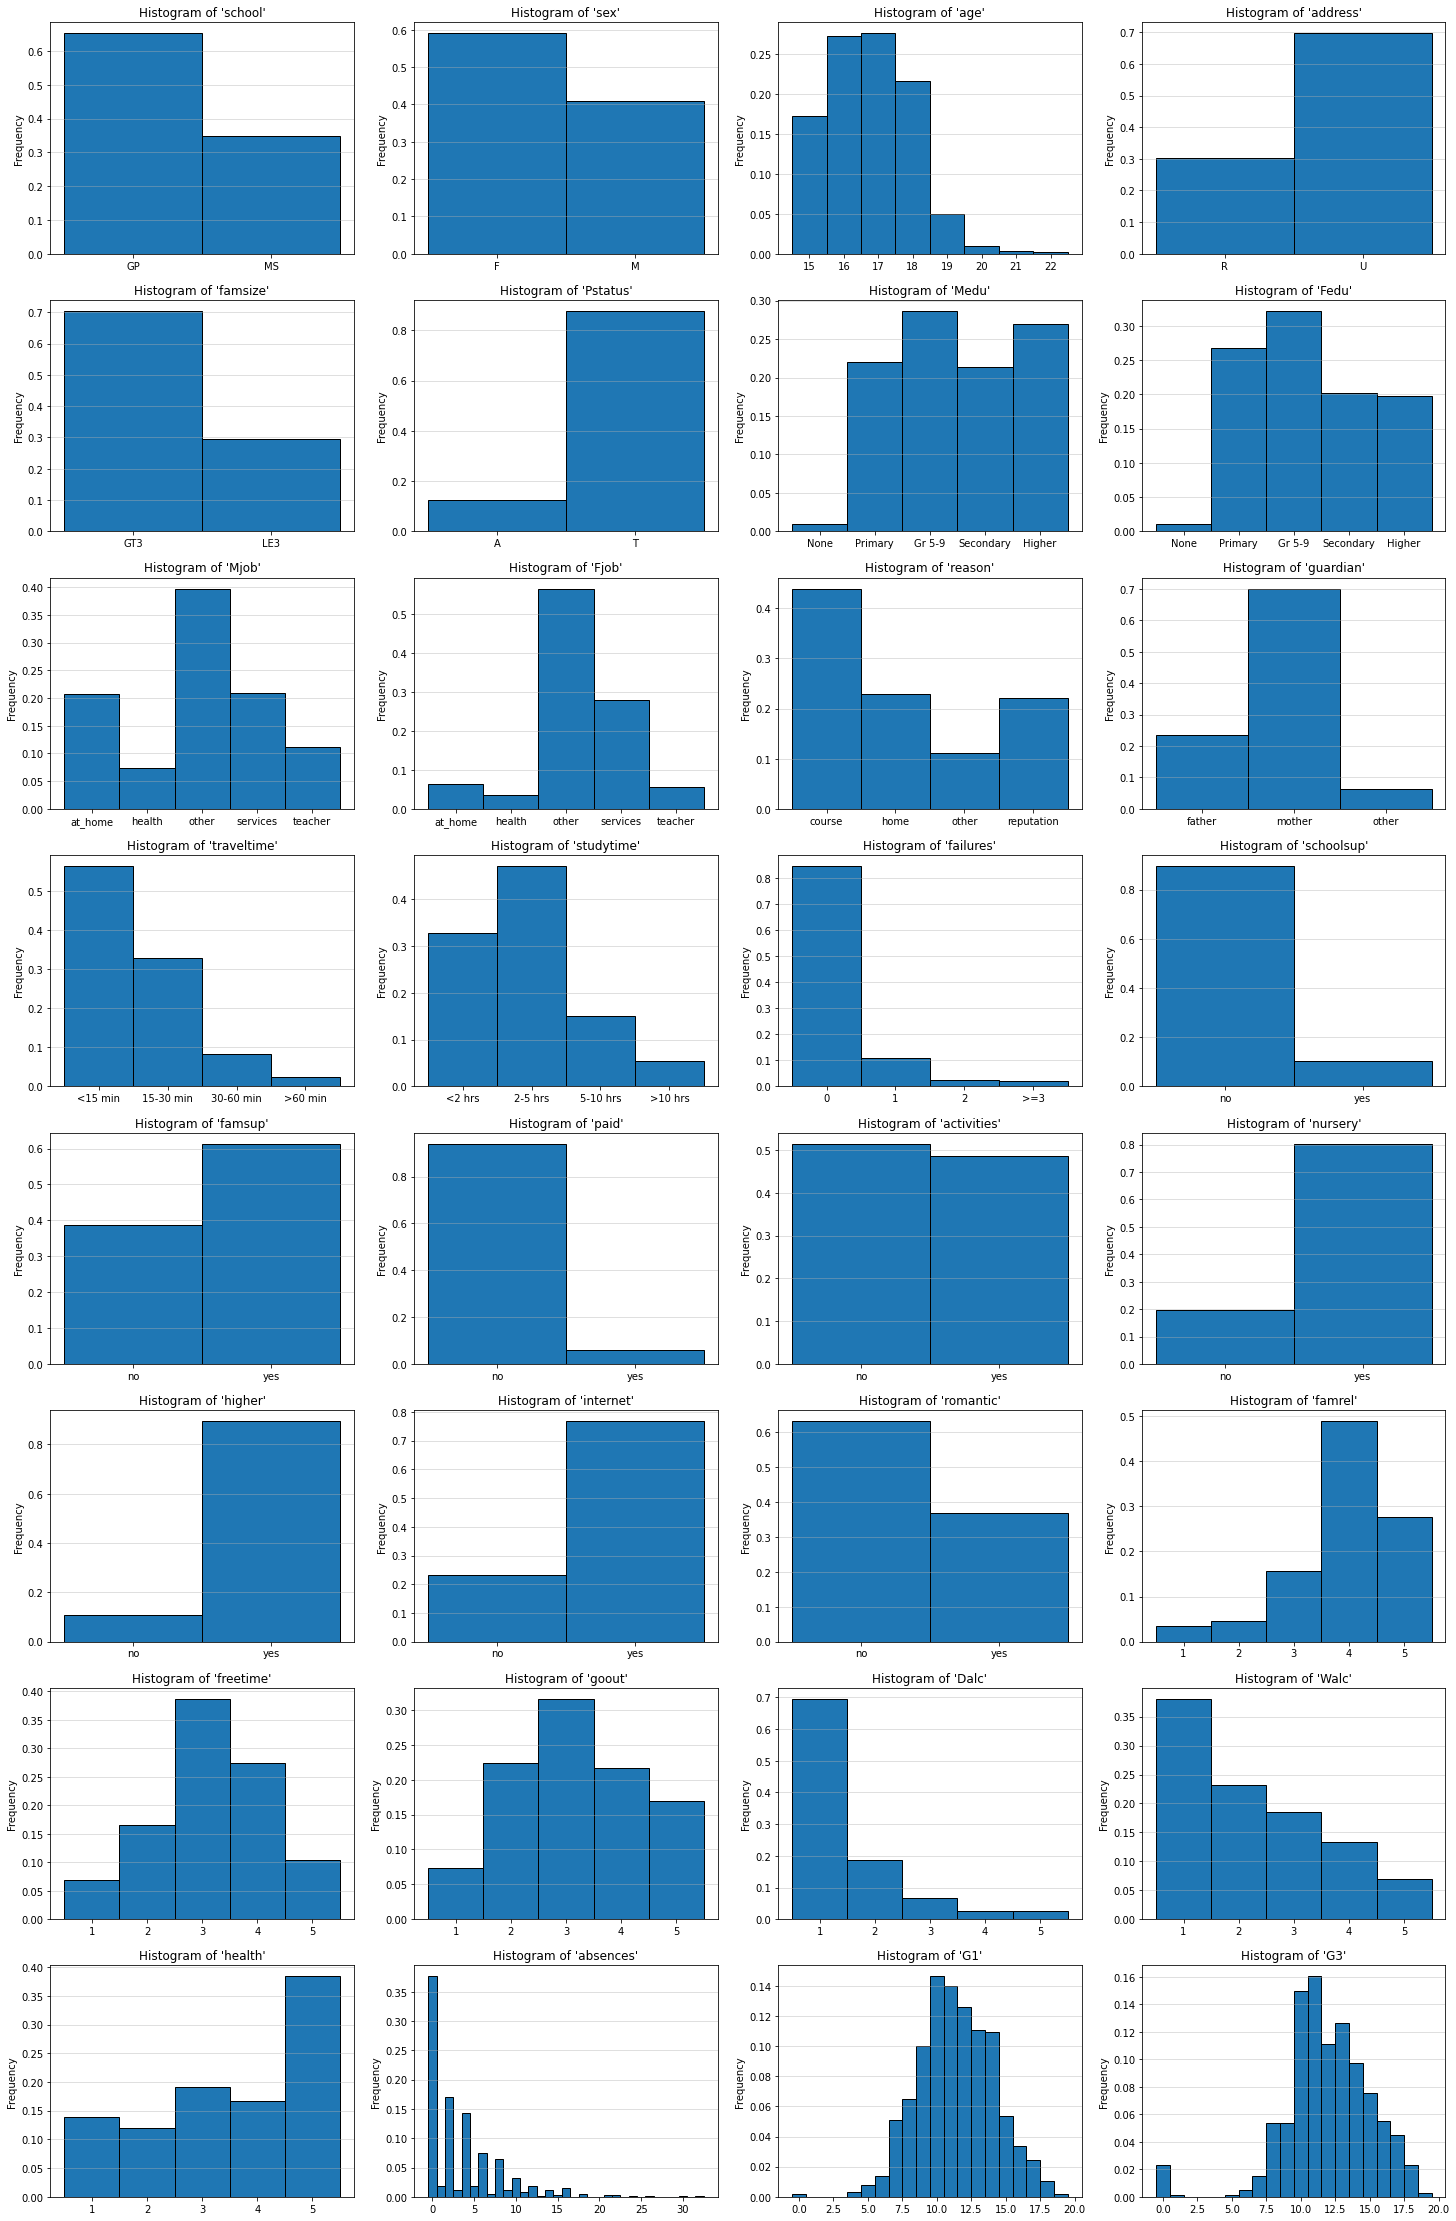

In [6]:
plt.figure(figsize=(25,40))
for i, col in enumerate(students_df.columns):
  plt.subplot(8,4,i+1)
  ticks = None
  labels = None
  data = students_df.sort_values(col)[col]
  if col in num_cats.keys():
    bins = range(students_df[col].min(),students_df[col].max()+2)
    ticks = [*num_cats[col]]
    labels = [*num_cats[col].values()]
  elif students_df[col].dtype == 'int64':
    bins = range(students_df[col].min(),students_df[col].max()+2)
  else:
    bins = range(students_df[col].nunique()+1)
  plt.hist(data, bins=bins, align='left', ec='black', density=True)
  plt.title("Histogram of '{}'".format(col))
  plt.xticks(ticks=ticks, labels=labels)
  plt.ylabel("Frequency")
  plt.grid(True, axis='y', alpha=0.5)
plt.show()

###**Binary Variables**
The 'sex', 'famsup', 'activities', and 'romantic' variables are roughly balanced (>35% in each category), whereas 'school', 'address', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', and 'internet' are not.

In [7]:
balanced = []
unbalanced = []
for col in binary_cols:
  smaller_pct = students_df[col].value_counts().min() / students_df[col].shape[0]
  if smaller_pct > 0.35:
    balanced = balanced + [col]
  else:
    unbalanced = unbalanced + [col]
print("The following binary variables are roughly balanced:", balanced)
print("The following binary variables are roughly unbalanced:", unbalanced)

The following binary variables are roughly balanced: ['sex', 'famsup', 'activities', 'romantic']
The following binary variables are roughly unbalanced: ['school', 'address', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'internet']


###**Non-Binary Variables**
The main thing to note is that with the exception of 'freetime' and 'goout', none of our categorical variables that could also be continuous look like they're remotely normal. This makes the decision to treat them as categorical much more sensible, especially with regards to a linear model.

We also see that the 'Medu' and 'Fedu' variables have almost no observations with the 'None' value. Therefore, we will merge 'None' observations in with 'Primary'. Additionally, we'll create a new variable called 'Hedu' which will simply be the highest level of education achieved by either parent.

In [0]:
# create a copy with transformed variables
students2_df = students_df.copy()

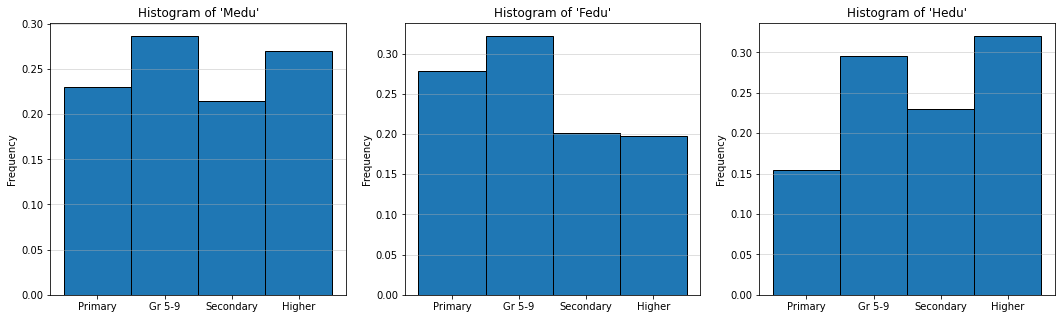

In [9]:
# turn 'None' entries into 'Primay'
students2_df.loc[students2_df['Medu'] == 0, 'Medu'] = 1
students2_df.loc[students2_df['Fedu'] == 0, 'Fedu'] = 1
students2_df['Hedu'] = students2_df['Medu'].combine(students2_df['Fedu'], max)

# redefine education labels
educ = {1: "Primary",
        2: "Gr 5-9",
        3: "Secondary",
        4: "Higher"}

# assign new labels to parent education categories
num_cats['Medu'] = educ
num_cats['Fedu'] = educ
num_cats['Hedu'] = educ

# plot distribution of reworked variables
plt.figure(figsize=(18,5))
for i, col in enumerate(['Medu', 'Fedu', 'Hedu']):
  plt.subplot(1,3,i+1)
  bins = range(students2_df[col].min(),students2_df[col].max()+2)
  ticks = [*num_cats[col]]
  labels = [*num_cats[col].values()]
  data = students2_df.sort_values(col)[col]
  plt.hist(data, bins=bins, align='left', ec='black', density=True)
  plt.title("Histogram of '{}'".format(col))
  plt.xticks(ticks=ticks, labels=labels)
  plt.ylabel("Frequency")
  plt.grid(True, axis='y', alpha=0.5)
plt.show()


###**Numerical Variables**
- **'age'**: Most ages are 15-18, which is to be expected for secondary students. There are a few students older than 18, but not many. Only 5% of students are 19 and less than that are 20-22. My early presumption is that age won't be a very important variable in determining final grade, however students older than 18 might be a special category. My instinct is to change 'age' into a categorical variable, and lump 19-22 into a '19+' category.
- **'absences'**: The frequency of absences declines exponentially, which is unsurprising. However, what is interesting is that even #'s of absences occur _far_ more often than odd ones (598 instances of an even #'s of absences vs 51 instances of an odd #) I tried to think of  a likely reason for this, and the best I can come up with is that maybe the school enforces that any student who misses school due to illness has to miss a minimum of 2 days. This would result in absences being more likely to come in bunches of 2, and therefore remain even. In order to 'smooth' out this histogram, I'll transform the variable to instead represent 'packets' of 2 absences.
- **G1/G3**: Both of these variables look approximately normal, with the exception of some low outliers. While trying to think of a good way to handle the outliers, I came across how the Portuguese grading system works and decided that converting G1 and G3 into categorical letter grades was a better way to go. The system works as follows:

Grade Range | Letter Grade
------------|--------------
   20-18    | A (Excellent)
   17-16    | B (Very Good)
   15-14    | C (Good)
   13-12    | D (Satisfactory)
   11-10    | E (Sufficient)
   <10      | F (Fail)

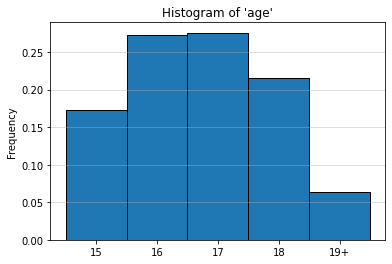

In [10]:
# turn 'age' into a categorical variable, lumping together 19-22
students2_df.loc[students2_df['age'] > 18, 'age'] = '19+'
students2_df['age'] = students2_df['age'].astype(str)

# plot distribution of redefined age categories
bins = range(students2_df['age'].nunique()+1)
data = students2_df.sort_values('age')['age']
plt.hist(data, bins=bins, align='left', ec='black', density=True)
plt.title("Histogram of 'age'")
plt.ylabel("Frequency")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

In [11]:
# examine even vs odd #'s of student absences
even_abs = students2_df[students2_df.absences % 2 == 0].shape[0]
odd_abs = students2_df[students2_df.absences % 2 != 0].shape[0]
print("There are {} students who had an even number of absences compared to only {} students with an odd number.".format(even_abs, odd_abs))

There are 598 students who had an even number of absences compared to only 51 students with an odd number.


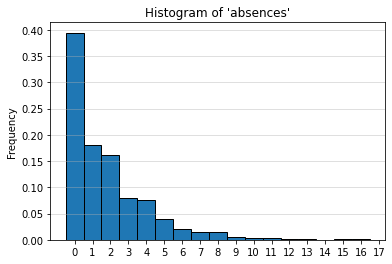

In [12]:
# transform absences into packets of 2 absences to 'smooth' the histogram
students2_df['absences'] = students2_df['absences'].floordiv(2)

# plot distribution
bins = range(students2_df['absences'].min(), students2_df['absences'].max()+2)
data = students2_df['absences']
plt.hist(data, bins=bins, align='left', ec='black', density=True)
plt.title("Histogram of 'absences'")
plt.xticks(ticks=bins)
plt.ylabel("Frequency")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

At this point, since absences is our only continuous variable left, and because of the way it's distributed, it makes sense to try things out with a categorical transformation. We'll keep the continuous version, for now, and add in a categorical version as well. Categories will be based on number of 'packets' of two absences as below:

Packets | Category
--------|---------
   0    |  Low
  1-2   |  Medium
  >=3   |  High

After doing so, we can see that the categorical version of 'absences' is fairly well balanced.

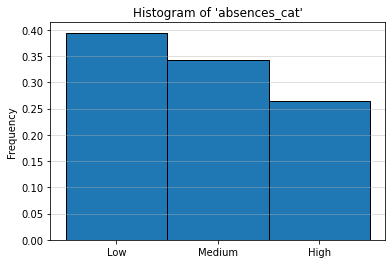

In [13]:
# regroup into 'Low', 'Medium', and 'High' categories
students2_df.loc[students2_df['absences'] == 0, 'absences_cat'] = 0
students2_df.loc[students2_df['absences'].between(1,2), 'absences_cat'] = 1
students2_df.loc[students2_df['absences'] >= 3, 'absences_cat'] = 2
students2_df['absences_cat'] = students2_df['absences_cat'].astype(int)

# define new absences labels
absc = {0: "Low",
        1: "Medium",
        2: "High"}

# add new labels to label dictionary
num_cats['absences_cat'] = absc

# plot distribution
bins = range(students2_df['absences_cat'].min(),students2_df['absences_cat'].max()+2)
ticks = [*num_cats['absences_cat']]
labels = [*num_cats['absences_cat'].values()]
data = students2_df['absences_cat']
plt.hist(data, bins=bins, align='left', ec='black', density=True)
plt.title("Histogram of 'absences_cat'")
plt.xticks(ticks=ticks, labels=labels)
plt.ylabel("Frequency")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

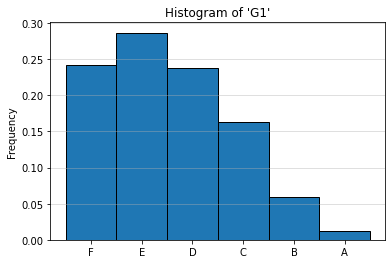

In [14]:
# turn 'G1' into a categorical variable of letter grades
students2_df.loc[students_df['G1'] >= 18, 'G1'] = 'A'
students2_df.loc[students_df['G1'].between(16,17), 'G1'] = 'B'
students2_df.loc[students_df['G1'].between(14,15), 'G1'] = 'C'
students2_df.loc[students_df['G1'].between(12,13), 'G1'] = 'D'
students2_df.loc[students_df['G1'].between(10,11), 'G1'] = 'E'
students2_df.loc[students_df['G1'] < 10, 'G1'] = 'F'

# plot distribution
bins = range(students2_df['G1'].nunique()+1)
data = students2_df.sort_values('G1', ascending=False)['G1']
plt.hist(data, bins=bins, align='left', ec='black', density=True)
plt.title("Histogram of 'G1'")
plt.ylabel("Frequency")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

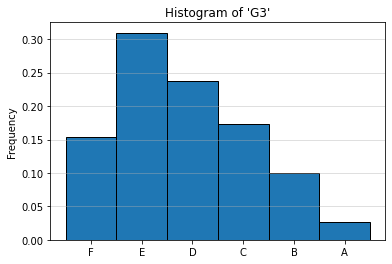

In [15]:
# turn 'G3' into a categorical variable of letter grades
students2_df.loc[students_df['G3'] >= 18, 'G3'] = 'A'
students2_df.loc[students_df['G3'].between(16,17), 'G3'] = 'B'
students2_df.loc[students_df['G3'].between(14,15), 'G3'] = 'C'
students2_df.loc[students_df['G3'].between(12,13), 'G3'] = 'D'
students2_df.loc[students_df['G3'].between(10,11), 'G3'] = 'E'
students2_df.loc[students_df['G3'] < 10, 'G3'] = 'F'

# plot distribution
bins = range(students2_df['G3'].nunique()+1)
data = students2_df.sort_values('G3', ascending=False)['G3']
plt.hist(data, bins=bins, align='left', ec='black', density=True)
plt.title("Histogram of 'G3'")
plt.ylabel("Frequency")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

After all of this, the only variable we have left that is being treated as continuous is 'absences'. The other 30 variables are categorical, although none of them have more than 5 possible values, with the exception of 'G1' which has 7. Additionally, by transforming our target from continuous to categorical, we've changed our problem from regression into classification. The next task is to see which of our variables demonstrate a relationship to the target, so we can eliminate any potentially insignificant variables or categories.

##Feature Generation

###Categorical Variables

To see how our categorical variables relate to our target, we'll visualize the relationship using normalized stacked bar plots, and we'll use a chi-squared test for independence, and Cramer's V as a metric to determine if the relationship is statistically significant.

In [0]:
# isolate categorical columns and convert to string
cat_cols = [x for x in students2_df.columns if not x in ['absences', 'G3']]
students2_df = students2_df[cat_cols + ['G3']].astype(str)

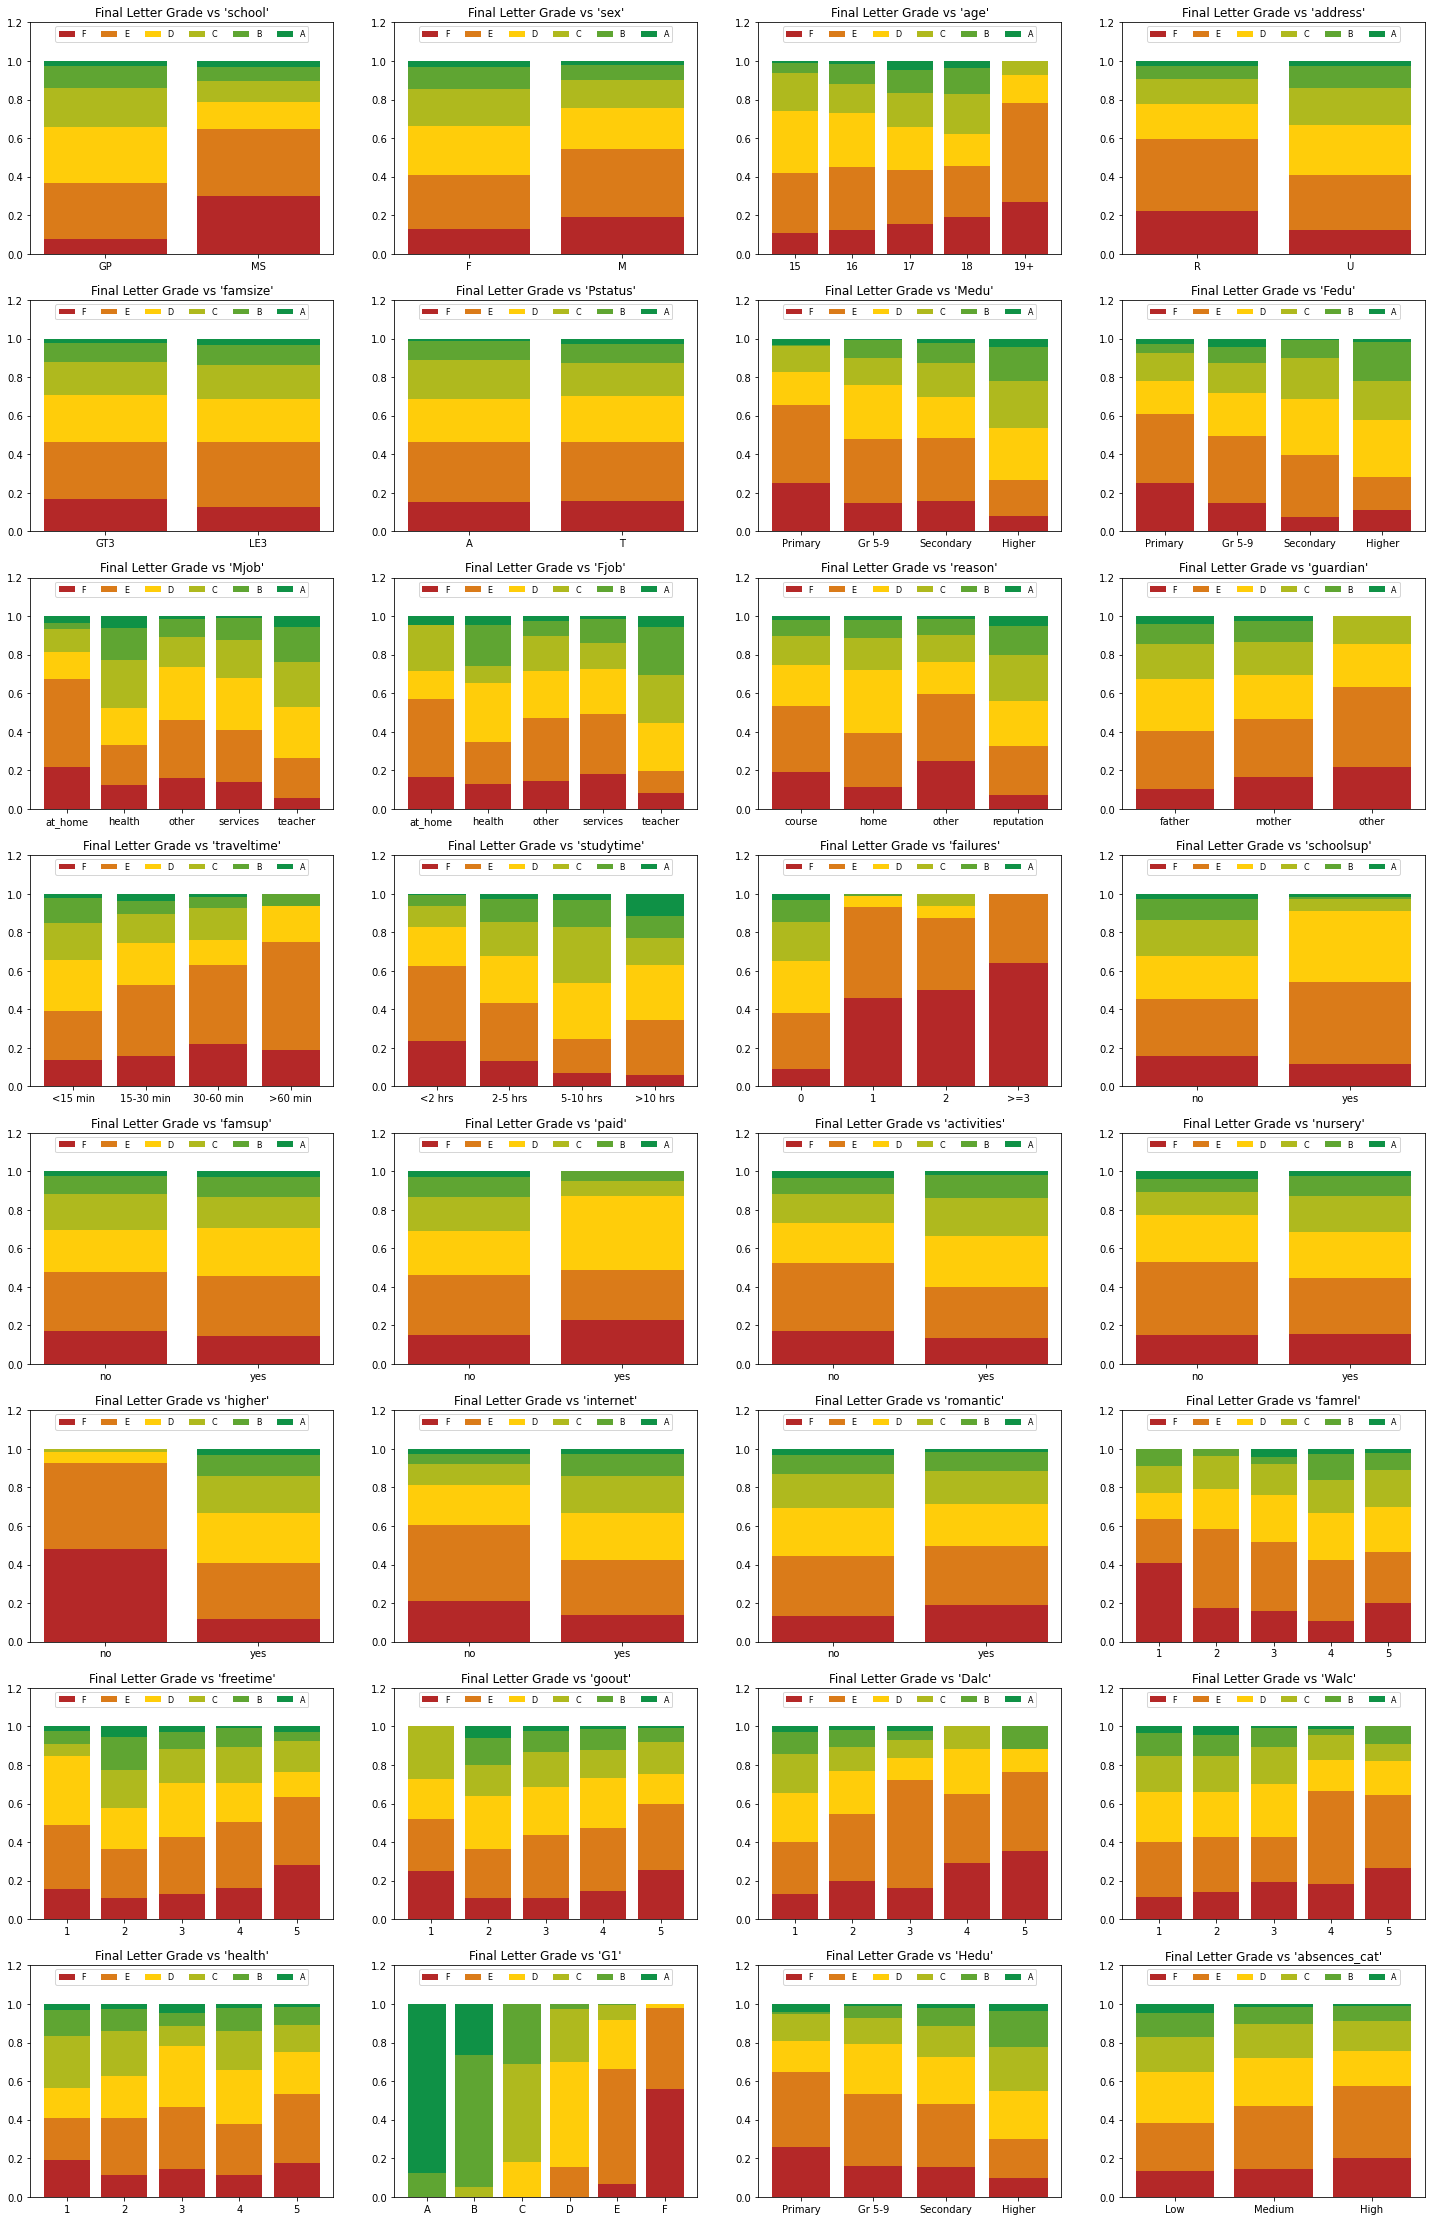

In [17]:
# plot stacked bar graphs
plt.figure(figsize=(25,40))
for i, col in enumerate(cat_cols):
  plt.subplot(8,4,i+1)
  labels = students2_df.sort_values(col)[col].unique()
  tick_labels = [*num_cats[col].values()] if col in num_cats.keys() else labels 
  freq_df = pd.DataFrame()
  for i, label in enumerate(labels):
    freq_series = students2_df[students2_df[col] == labels[i]]['G3'].value_counts().sort_index(ascending=False) / students2_df[students2_df[col] == labels[i]].shape[0]
    freq_df = pd.concat([freq_df, freq_series], axis=1).fillna(0).sort_index(ascending=False)
  bigarray = np.array(freq_df)
  grades = ['F','E','D','C','B','A']
  colors = ['#B42828', '#DA7B19', '#FFCD0A', '#AFB91E', '#5FA532', '#0F9146']

  for i in range(len(grades)):
    plt.bar(labels, bigarray[i], bottom=bigarray[:i].sum(axis=0), label=grades[i], color=colors[i], tick_label=tick_labels)
  plt.legend(loc=9, ncol=7, prop={'size': 8})
  plt.title("Final Letter Grade vs '{}'".format(col))
  plt.ylim(0,1.2)
plt.show()

The stacked bar plots give us a really good picture of which categorical variables seem to have an effect on a student's final grade. For example, variables like 'Pstatus', 'famsup', and 'paid' appear to have almost no relationship with final letter grade. On the other hand, the relationship between final grade and variables like 'school', 'age', 'Hedu', and (expectedly) 'G1' is very apparent.

We could sift through, and try to eyeball which ones are relevant, and which ones aren't, but it's more rigorous to use a chi-squared test for independence, which we will do now. We'll test at the 95% significance level and see which variables are going to be important to our model, and which ones won't be.

In [18]:
signif = []
insignif = []
other = []
for col in cat_cols:
  crosstab = pd.crosstab(students2_df[col], students2_df['G3'])
  chi2, p, dof, expected = chi2_contingency(crosstab)
  print("Chi-Squared Test for {}".format(col))
  print('P-value: {:.5f}'.format(p))
  if p < 0.05:
    signif.append(col)
  else:
    insignif.append(col)
  if expected.astype(int).min() < 5:
    print("WARNING: OBSERVED FREQ > 5 REQUIREMENT NOT MET")
    other.append(col)
  print("-"*40)
print("There are {} significant variables which are: {}".format(len(signif), signif))
print("There are {} insignificant variables which are: {}".format(len(insignif), insignif))
print("There are {} variables which do not meet chi-squared requirements: {}".format(len(other), other))

Chi-Squared Test for school
P-value: 0.00000
----------------------------------------
Chi-Squared Test for sex
P-value: 0.02615
----------------------------------------
Chi-Squared Test for age
P-value: 0.00214
----------------------------------------
Chi-Squared Test for address
P-value: 0.00059
----------------------------------------
Chi-Squared Test for famsize
P-value: 0.73463
----------------------------------------
Chi-Squared Test for Pstatus
P-value: 0.95220
----------------------------------------
Chi-Squared Test for Medu
P-value: 0.00000
----------------------------------------
Chi-Squared Test for Fedu
P-value: 0.00000
----------------------------------------
Chi-Squared Test for Mjob
P-value: 0.00001
----------------------------------------
Chi-Squared Test for Fjob
P-value: 0.01311
----------------------------------------
Chi-Squared Test for reason
P-value: 0.00072
----------------------------------------
Chi-Squared Test for guardian
P-value: 0.21962
------------------

It looks like a lot of our variables don't pass the requirements for using a chi-squared test for independence. This is the result of a few things. First of all, we only have ~650 observations, which is a relatively small number. Secondly, some of our variables have categories with low frequencies. And lastly, our target has 6 possible values, which spreads the observations out. This presents us with 3 options in the event that our model performance is lackluster:
1. Gather more data. This could be achieved by having students fill out the survey at other schools, or by issuing the survey every year.
2. Reduce variable categories. This is feasible for some of our variables, but not the binary ones. That being said, a binary variable that is very unbalanced isn't particularly useful anyway. It's not surprising that of the 7 variables that met the chi-squared test requirements, 4 of them are the balanced binary variables that we identified earlier.
3. Reduce target categories. Presently, our model would classify a new student by predicting their final grade in the course. If the model doesn't perform well in cross validation it might be worth exploring simplifying our target into 'Pass' and 'Fail' categories.

We'll keep this in mind for if we decide to comment on the statistical significance of our variables, but for the purpose of feature selection it should be fine to move forward using the features with p-values under 0.05.

In [0]:
# generate test and training sets
X = pd.get_dummies(students2_df[signif], drop_first=True)
y = students2_df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)

##Model Construction and Evaluation

We will construct and tune the following classification models:
- Logistic
- KNN
- Decision Tree
- RandomForest
- SVC
- Gradient Boosting

Models will be evaluated on a 5-fold cross validation score. Additionally, since a purpose of this model could be to identify students who are at risk of failing the course, we want to prioritize models that don't let students "slip through the cracks". If we define a failing grade (F or F-) as a 'positive', then a 'false negative' would equate to incorrectly predicting a student is on track to pass the course. We want to minimize this, which translates to maximizing our recall. 

###Definition of Confusion Matrix Function

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    from sklearn.metrics import recall_score

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    recall = cm[0][0] / np.sum(cm, axis=0)[0]
    dummy_acc = np.sum(cm, axis=0).max() / float(np.sum(cm))

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted Grade')
    plt.xlabel('True Grade\n\naccuracy={:0.4f}; misclass={:0.4f}; recall={:0.4f}\ndummy accuracy = {:0.4f}'.format(accuracy, misclass, recall, dummy_acc))
    plt.show()

###Logistic Classifier Tuning

For our logistic classifier, we'll use the 'lbfgs' solver and one-vs-rest to handle the multiple class target. We'll use L2 regularization which imposes a penalty on large coefficients, and tune the value of C, which adjusts the strength of the regularization.

It looks like a regularization parameter between 0.1 and 0.2 is our best bet. This is around where our recall begins to level off, and before our cv_score begins to dip slightly. As we increase C, we are imposing a smaller penalty large on model coefficients, and are allowing the model to overfit to the training data.

In [0]:
# tune the model regularization
Cs = np.arange(0.01,1,0.01)
plot_data = np.empty((0,2))
for c in Cs:
  clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000, penalty='l2', C=c)
  cv_scores = cross_val_score(clf, X, y, cv=5)
  score_avg = np.mean(cv_scores)
  y_preds = cross_val_predict(clf, X, y, cv=5)
  recall = recall_score(y, y_preds, labels='F', average=None)[0]
  plot_data = np.append(plot_data, [[score_avg, recall]], axis=0)

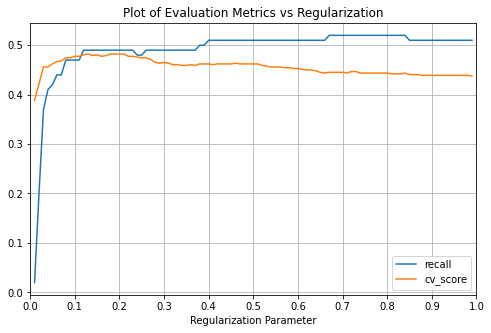

In [22]:
# extract CV score and recall data
score_avgs = plot_data.take(0, axis=1)
recalls = plot_data.take(1, axis=1)

# plot results
plt.figure(figsize=(8,5))
plt.plot(Cs, recalls, label='recall')
plt.plot(Cs, score_avgs, label='cv_score')
plt.title("Plot of Evaluation Metrics vs Regularization")
plt.xlim(0,1)
plt.xlabel("Regularization Parameter")
plt.xticks(np.arange(0,1.1,.1))
plt.legend()
plt.grid()
plt.show()

###Logistic Classifier Results

After fitting the model on 75% of our observations and testing it with the remaining 25%, we end up with a model that predicts final grades with 57.7% accuracy. This is an improvement on the 35.6% accuracy of a model that predicts the most frequent grade (E) for every student. However, the model also has a recall of 50%, meaning that we failed to identify half of the students who ended up failing.

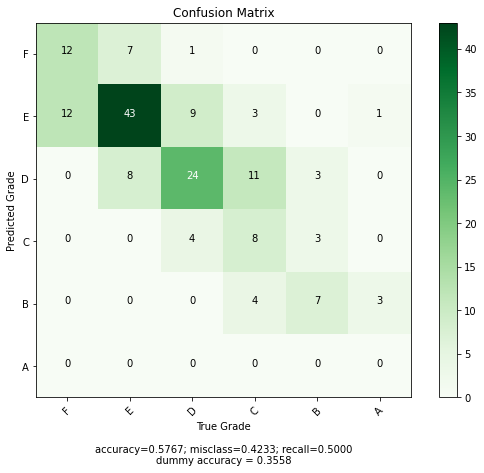

In [23]:
# fit and test model
clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000, penalty='l2', C=0.15)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
confusion = confusion_matrix(predictions, y_test, labels=['F', 'E', 'D', 'C', 'B', 'A'])
plot_confusion_matrix(cm=confusion, target_names = ['F', 'E', 'D', 'C', 'B', 'A'], title = 'Confusion Matrix', cmap='Greens', normalize=False)

###KNN Classifier Tuning

For our KNN Classifier we'll use distance weighting. Since all of our features are categorical, there is no need to worry about normalizing. We'll tune the value of K to optimize our CV scores and recall.

We hit our best balance of CV scores and recall when we use the 11 nearest neighbors.

In [0]:
# tune the number of neighbors to use
Ks = np.arange(1,21)
plot_data = np.empty((0,2))
for k in Ks:
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  cv_scores = cross_val_score(knn, X, y, cv=5)
  score_avg = np.mean(cv_scores)
  y_preds = cross_val_predict(knn, X, y, cv=5)
  recall = recall_score(y, y_preds, labels='F', average=None)[0]
  plot_data = np.append(plot_data, [[score_avg, recall]], axis=0)

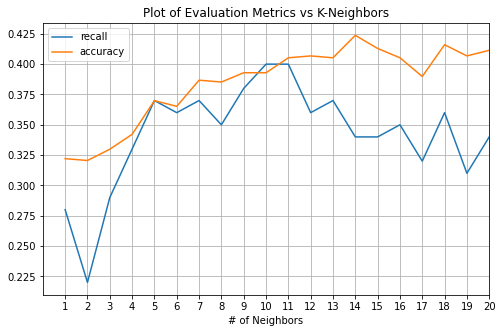

In [25]:
# extract CV score and recall data
score_avgs = plot_data.take(0, axis=1)
recalls = plot_data.take(1, axis=1)

# plot results
plt.figure(figsize=(8,5))
plt.plot(Ks, recalls, label='recall')
plt.plot(Ks, score_avgs, label='accuracy')
plt.title("Plot of Evaluation Metrics vs K-Neighbors")
plt.xlim(0,1)
plt.xlabel('# of Neighbors')
plt.xticks(Ks)
plt.legend()
plt.grid()
plt.show()

###KNN Classifier Results

Model accuracy is only 46.6% and recall is even worse at 37.5%. Overall, this model isn't very good.

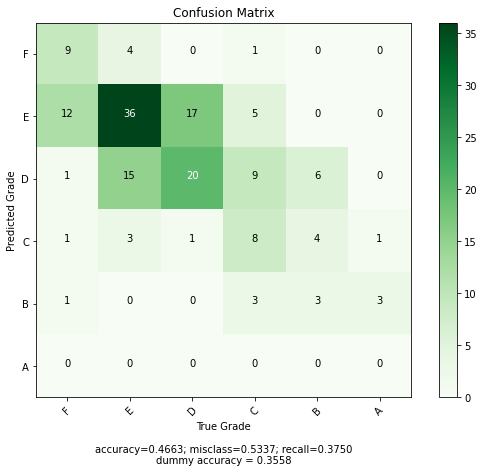

In [26]:
# fit and test model
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
confusion = confusion_matrix(predictions, y_test, labels=['F', 'E', 'D', 'C', 'B', 'A'])
plot_confusion_matrix(cm=confusion, target_names = ['F', 'E', 'D', 'C', 'B', 'A'], title = 'Confusion Matrix', cmap='Greens', normalize=False)

###Decision Tree Tuning

For our Decision Tree model we will tune two parameters. The maximum number of features per node, and the maximum depth of the tree. Since we have two parameters to tune, we'll use color maps to view the effect on our metrics.

It looks like both metrics hit their best values at 15 features per node and a maximum tree depth of 5.

In [0]:
# tune tree depth and features per node
Is = np.arange(1,21)
Js = np.arange(1,21)
plot_data = np.empty((0,4))
for i in Is:
  for j in Js:
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=i,
        max_depth=j,
        # we'll use a random state, just so results are repeatable
        random_state = 1337
    )

    # score the tree with cross validation
    cv_scores = cross_val_score(decision_tree, X, y, cv=5)
    score_avg = np.mean(cv_scores)
    y_preds = cross_val_predict(decision_tree, X, y, cv=5)
    recall = recall_score(y, y_preds, labels='F', average=None)[0]
    plot_data = np.append(plot_data, [[i, j, score_avg, recall]], axis=0)

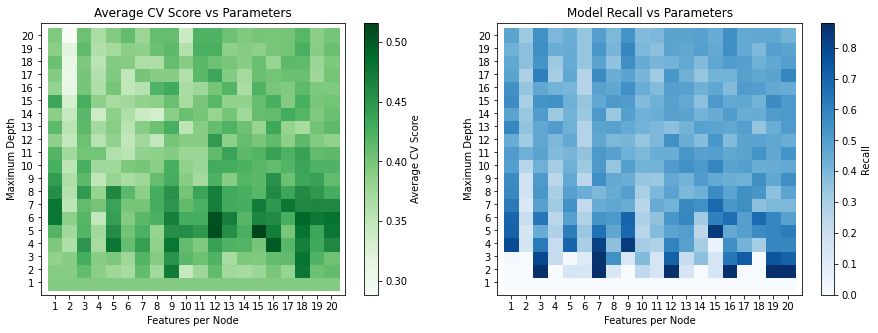

In [28]:
# extract CV score and recall data
num_feats = plot_data.take(0, axis=1)
max_depths = plot_data.take(1, axis=1)
avg_scores = plot_data.take(2, axis=1)
recalls = plot_data.take(3, axis=1)

# plot results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(num_feats,
            max_depths,
            c=avg_scores,
            cmap='Greens',
            marker='s',
            s=200)
plt.title("Average CV Score vs Parameters")
plt.xlabel("Features per Node")
plt.xticks(range(1,21))
plt.ylabel("Maximum Depth")
plt.yticks(range(1,21))
cbar = plt.colorbar()
cbar.set_label('Average CV Score')

plt.subplot(1,2,2)
plt.scatter(num_feats,
            max_depths,
            c=recalls,
            cmap='Blues',
            marker='s',
            s=200)
plt.title("Model Recall vs Parameters")
plt.xlabel("Features per Node")
plt.xticks(range(1,21))
plt.ylabel("Maximum Depth")
plt.yticks(range(1,21))
cbar = plt.colorbar()
cbar.set_label('Recall')

plt.show()

###Decision Tree Results

We fit the model with our training data, and then test it. The model predicts the test observations with 52.8% accuracy, which is a reduction from the Logistic Classifier. However, there is a noticable increase in our recall, up to 95.8% on this data. It looks like this model is much more conservative than the Logistic Classifier, predicting 47 students would fail (including 2 who got A's!). However, 44 of those 47 either failed, or were one letter grade away from failing, so if the intent of this model is to identify students who need wither extra help, or a change in behavior, this isn't a bad fit.

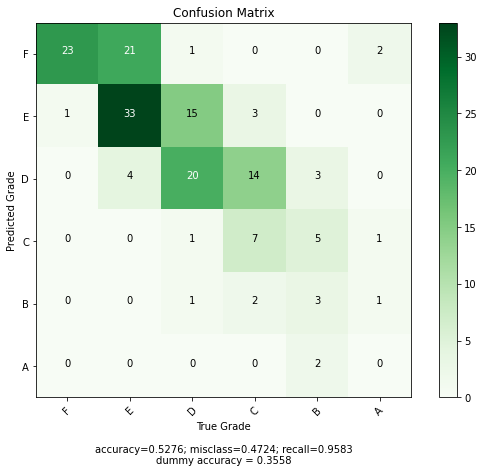

In [29]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=15,
    max_depth=5,
    random_state=1337)

decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
confusion = confusion_matrix(predictions, y_test, labels=['F', 'E', 'D', 'C', 'B', 'A'])
plot_confusion_matrix(cm=confusion, target_names = ['F', 'E', 'D', 'C', 'B', 'A'], title = 'Confusion Matrix', cmap='Greens', normalize=False)

###RandomForest Tuning

For the RandomForest model, we'll be tuning 4 parameters. We'll start by tuning n_estimators on a basic RandomForestClassifier to find out roughly the minimum number of trees it takes before our CV scores and recall begin to stabilize. After that, we'll tune the maximum depth of each tree and the minimum number of samples on each leaf. Finally, we'll tune the maximum features per node. Once we've done this, we'll iterate back through the process, this time starting with the tuned values of max_depth, min_samples_leaf, and max_features.

The results shown below are the second pass through the process. We end up with the following tuned features:
- n_estimators = 650
- max_depth = 6
- max_features = 12
- min_samples_leaf = 4

In [0]:
# tune number of trees to build
estimators = np.arange(100,1010,10)
plot_data = np.empty((0,2))
for n in estimators:
  rfc = RandomForestClassifier(n_estimators=n,
                               max_depth=6,
                               max_features=12,
                               min_samples_leaf=4,
                               random_state=1337)
  cv_scores = cross_val_score(rfc, X, y, cv=5)
  score_avg = np.mean(cv_scores)
  y_preds = cross_val_predict(rfc, X, y, cv=5)
  recall = recall_score(y, y_preds, labels='F', average=None)[0]
  plot_data = np.append(plot_data, [[score_avg, recall]], axis=0)


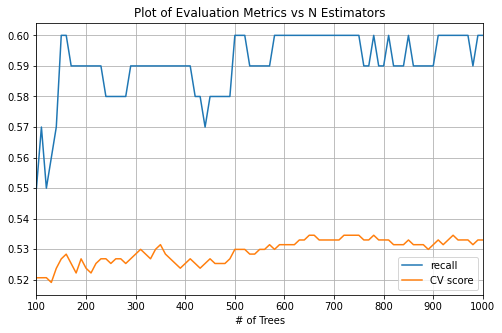

In [0]:
# extract CV score and recall data
score_avgs = plot_data.take(0, axis=1)
recalls = plot_data.take(1, axis=1)

# plot results
plt.figure(figsize=(8,5))
plt.plot(estimators, recalls, label='recall')
plt.plot(estimators, score_avgs, label='CV score')
plt.title("Plot of Evaluation Metrics vs N Estimators")
plt.xlim(100,1000)
plt.xlabel('# of Trees')
plt.legend()
plt.grid()
plt.show()

In [0]:
# tune tree depth and minimum samples per leaf
I = np.arange(1,21)
J = np.arange(1,21)
plot_data = np.empty((0,4))
for i in I:
  for j in J:
    rfc = RandomForestClassifier(
        n_estimators=650,
        max_depth=i,
        max_features=12,
        min_samples_leaf=j,
        random_state=1337
    )

    # score with cross validation
    cv_scores = cross_val_score(rfc, X, y, cv=5)
    score_avg = np.mean(cv_scores)
    y_preds = cross_val_predict(rfc, X, y, cv=5)
    recall = recall_score(y, y_preds, labels='F', average=None)[0]
    plot_data = np.append(plot_data, [[i, j, score_avg, recall]], axis=0)

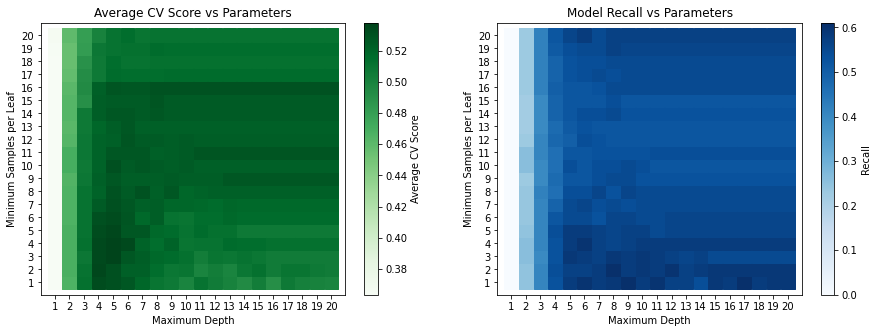

In [0]:
# extract CV score and recall data
max_depths = plot_data.take(0, axis=1)
min_samples_leafs = plot_data.take(1, axis=1)
avg_scores = plot_data.take(2, axis=1)
recalls = plot_data.take(3, axis=1)

# plot results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(max_depths,
            min_samples_leafs,
            c=avg_scores,
            cmap='Greens',
            marker='s',
            s=190)
plt.title("Average CV Score vs Parameters")
plt.xlabel("Maximum Depth")
plt.xticks(I)
plt.ylabel("Minimum Samples per Leaf")
plt.yticks(J)
cbar = plt.colorbar()
cbar.set_label('Average CV Score')

plt.subplot(1,2,2)
plt.scatter(max_depths,
            min_samples_leafs,
            c=recalls,
            cmap='Blues',
            marker='s',
            s=190)
plt.title("Model Recall vs Parameters")
plt.xlabel("Maximum Depth")
plt.xticks(I)
plt.ylabel("Minimum Samples per Leaf")
plt.yticks(J)
cbar = plt.colorbar()
cbar.set_label('Recall')

plt.show()

In [0]:
# tune maximum features considered per node
max_features = np.arange(1,21)
plot_data = np.empty((0,2))
for n in max_features:
  rfc = RandomForestClassifier(
      n_estimators=650,
      max_depth=6,
      max_features=n,
      min_samples_leaf=4,
      random_state=1337
  )

  cv_scores = cross_val_score(rfc, X, y, cv=5)
  score_avg = np.mean(cv_scores)
  y_preds = cross_val_predict(rfc, X, y, cv=5)
  recall = recall_score(y, y_preds, labels='F', average=None)[0]
  plot_data = np.append(plot_data, [[score_avg, recall]], axis=0)

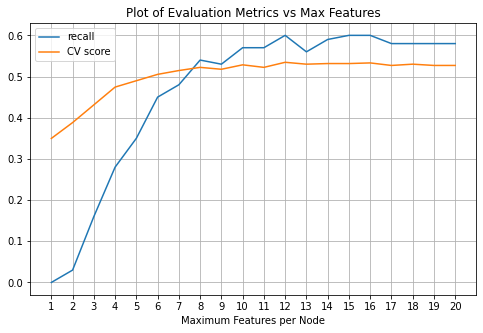

In [0]:
# extract CV score and recall data
score_avgs = plot_data.take(0, axis=1)
recalls = plot_data.take(1, axis=1)

# plot results
plt.figure(figsize=(8,5))

plt.plot(max_features, recalls, label='recall')
plt.plot(max_features, score_avgs, label='CV score')
plt.title("Plot of Evaluation Metrics vs Max Features")
plt.xlim(0,21)
plt.xlabel('Maximum Features per Node')
plt.xticks(max_features)
plt.legend()
plt.grid()
plt.show()

###RandomForest Results

The model ends up with an accuracy of 60.1% on the test data, which is the best so far. The recall is also quite high (83.3%). Not as high as the single optimized decision tree, but that's likely because of how zealous the tree was about predicting failing grades. This is definitely our best model so far.

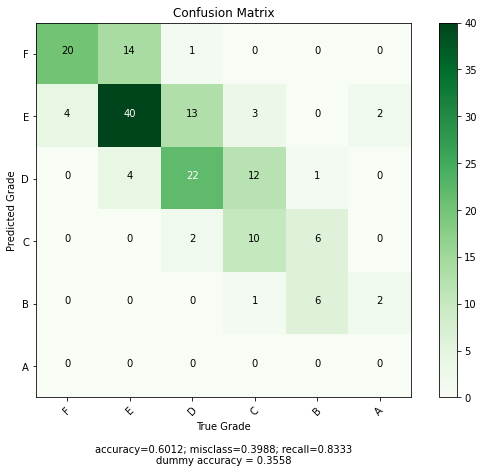

In [0]:
# fit model and test
rfc = RandomForestClassifier(n_estimators=650,
                             max_depth=6,
                             max_features=12,
                             min_samples_leaf=4)

rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

confusion = confusion_matrix(predictions, y_test, labels=['F', 'E', 'D', 'C', 'B', 'A'])
plot_confusion_matrix(cm=confusion, target_names = ['F', 'E', 'D', 'C', 'B', 'A'], title = 'Confusion Matrix', cmap='Greens', normalize=False)

###Support Vector Classifier Tuning

For this model we'll be simultaneously tuning C, the level of regularization, as well as gamma since we're using nonlinear hyperplanes (RBF kernel).

We settle on values of C=1.35 and gamma=0.045

In [0]:
C = np.arange(0.15,3.15,0.15)
G = np.arange(0.005,0.105,0.005)
plot_data = np.empty((0,4))
for c in C:
  for g in G:
    svc = SVC(
        C=c,
        gamma=g,
        # we'll use a random state, just so results are repeatable
        random_state = 1337
    )

    # score the tree with cross validation
    cv_scores = cross_val_score(svc, X, y, cv=5)
    score_avg = np.mean(cv_scores)
    y_preds = cross_val_predict(svc, X, y, cv=5)
    recall = recall_score(y, y_preds, labels='F', average=None)[0]
    plot_data = np.append(plot_data, [[c, g, score_avg, recall]], axis=0)

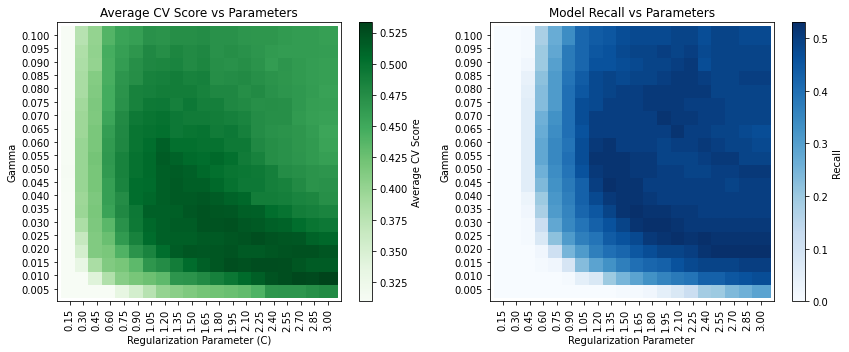

In [0]:
Cs = plot_data.take(0, axis=1)
Gs = plot_data.take(1, axis=1)
avg_scores = plot_data.take(2, axis=1)
recalls = plot_data.take(3, axis=1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(Cs,
            Gs,
            c=avg_scores,
            cmap='Greens',
            marker='s',
            s=300)
plt.title("Average CV Score vs Parameters")
plt.xlabel("Regularization Parameter (C)")
plt.xticks(C, rotation=90)
plt.ylabel("Gamma")
plt.yticks(G)
cbar = plt.colorbar()
cbar.set_label('Average CV Score')

plt.subplot(1,2,2)
plt.scatter(Cs,
            Gs,
            c=recalls,
            cmap='Blues',
            marker='s',
            s=300)
plt.title("Model Recall vs Parameters")
plt.xlabel("Regularization Parameter")
plt.xticks(C, rotation=90)
plt.ylabel("Gamma")
plt.yticks(G)
cbar = plt.colorbar()
cbar.set_label('Recall')

plt.tight_layout()
plt.show()

###Support Vector Classifier Results

The SVClassifier has accuracy comparable to the RandomForest model (59.5%), but the recall isn't as good (50%).

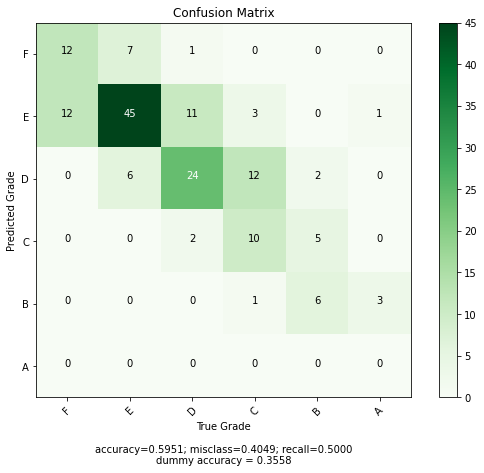

In [0]:
svc = SVC(C=1.35, gamma=0.045)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

confusion = confusion_matrix(predictions, y_test, labels=['F', 'E', 'D', 'C', 'B', 'A'])
plot_confusion_matrix(cm=confusion, target_names = ['F', 'E', 'D', 'C', 'B', 'A'], title = 'Confusion Matrix', cmap='Greens', normalize=False)

##Conclusion

Out of the models that I built, the RandomForest one performs the best. The highest accuracy on the test set and second highest recall. This model could definitely benefit from having more data to train on, but all things considered it does very well. All but 7 of the test set predictions were within one letter grade of the true values.

Students could use the model in order to see what grade they're heading for, and even see what effect changes in behavior can have on their overall performance. Teachers/counselors could similarly use the model to identify students that may be in need of additional help.